# Importing DataSet(train.csv , validation.csv)

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing data
train = pd.read_csv('../quanti/train.csv')
validate = pd.read_csv('../quanti/validation.csv')
train.head()

,Unnamed: 0,USER_ID,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q124742,Q124122,Q123464,...,Q99716,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024,Party
0,1044,1295,1971.0,Female,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,NaN,Yes,No,...,No,No,Yes,No,No,Yes,No,No,Yes,Democrat
1,2671,3324,1981.0,Female,"$25,001 - $50,000",Married (w/kids),Associate's Degree,NaN,NaN,NaN,...,No,No,Yes,NaN,No,Yes,NaN,Yes,No,Republican
2,5549,6939,1999.0,Female,NaN,Single (no kids),Current K-12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democrat
3,1231,1525,1997.0,Male,"$75,000 - $100,000",Single (no kids),Current K-12,NaN,NaN,NaN,...,No,Yes,No,No,No,Only-child,No,No,Yes,Democrat
4,2685,3341,1977.0,Male,"over $150,000",Married (w/kids),Doctoral Degree,No,No,No,...,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Democrat


# EDA(Exploratory Data Analysis)



In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Columns: 109 entries, Unnamed: 0 to Party
dtypes: float64(1), int64(2), object(106)
memory usage: 3.9+ MB


In [3]:
train.isnull().sum()

Unnamed: 0            0
USER_ID               0
YOB                 281
Gender               98
Income              885
HouseholdStatus     389
EducationLevel      735
Q124742            2929
Q124122            2092
Q123464            1963
Q123621            2027
Q122769            1888
Q122770            1770
Q122771            1759
Q122120            1741
Q121699            1567
Q121700            1596
Q120978            1577
Q121011            1545
Q120379            1600
Q120650            1540
Q120472            1636
Q120194            1757
Q120012            1588
Q120014            1726
Q119334            1684
Q119851            1521
Q119650            1635
Q118892            1508
Q118117            1583
                   ... 
Q106388            1910
Q106389            1959
Q106042            1884
Q105840            1961
Q105655            1773
Q104996            1798
Q103293            1802
Q102906            1904
Q102674            1954
Q102687            1844
Q102289         

Changing the Party column value to integer so that graph is easily manipulated.(Democrat=0, Republican=1)

In [4]:
party = {'Democrat': 0,'Republican': 1} 
train.Party = [party[item] for item in train.Party]
validate.Party = [party[item] for item in validate.Party]

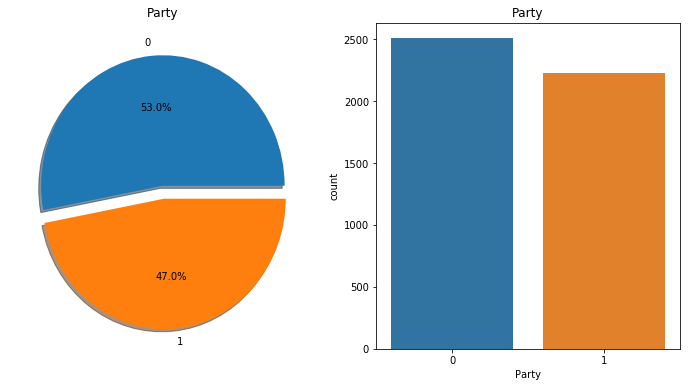

In [5]:
#checking the categorical distribution of data

f,ax=plt.subplots(1,2,figsize=(12,6))
train['Party'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Party')
ax[0].set_ylabel('')
sns.countplot('Party',data=train,ax=ax[1])
ax[1].set_title('Party')
plt.show()

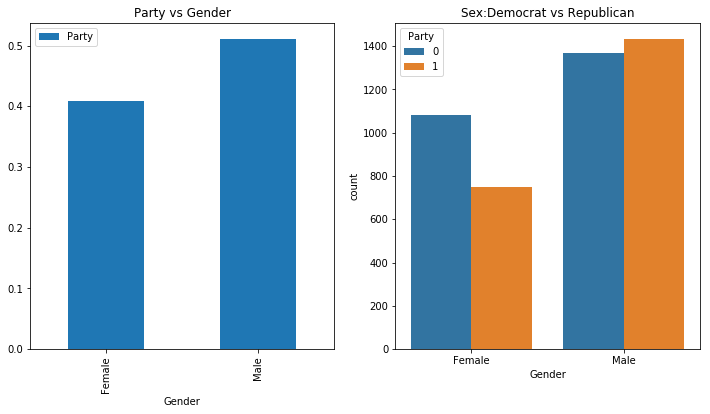

In [6]:
#checking the effect of gender on party
f,ax=plt.subplots(1,2,figsize=(12,6))
train[['Gender','Party']].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Party vs Gender')
sns.countplot('Gender',hue='Party',data=train,ax=ax[1])
ax[1].set_title('Sex:Democrat vs Republican')
plt.show()

In [7]:
pd.crosstab(train.Q98197,train.Party,margins=True).style.background_gradient(cmap='summer_r')

Party,0,1,All
Q98197,,,
No,1048,662,1710
Yes,463,634,1097
All,1511,1296,2807


While looking on crosstab we say that if person answer was No for Question 98197 then the probability
that he/she vote to party 0 i,e Democrat is 61.28% so it is considered as a important question.

In [8]:
pd.crosstab(train.Q98869,train.Party,margins=True).style.background_gradient(cmap='summer_r')

Party,0,1,All
Q98869,,,
No,416,220,636
Yes,1055,1069,2124
All,1471,1289,2760


In above question also if person answer was No for Question 98197 then the probability that he/she vote to party 0 i,e Democrat is 65.41% so it is considered as a important question.

In [9]:
pd.crosstab(train.Q96024,train.Party,margins=True).style.background_gradient(cmap='summer_r')

Party,0,1,All
Q96024,,,
No,607,469,1076
Yes,874,824,1698
All,1481,1293,2774


In above question(96024) the all probabilities comes under range 45% to 55% which is useless for us so we can discard this question.

Similarly after reading and analyzing all question i have selected only some of them i,e ('Q98197','Q98869','Q99480','Q99716','Q102687','Q112512','Q109244','Q108950','Q113181','Q113584','Q113992','Q114517','Q120650','Q115611','Q115899','Q116881','Q120472')  which are helping in predicting the outcome.

In [10]:
pd.crosstab(train.EducationLevel,train.Party,margins=True).style.background_gradient(cmap='summer_r')

Party,0,1,All
EducationLevel,,,
Associate's Degree,147,175,322
Bachelor's Degree,556,462,1018
Current K-12,374,338,712
Current Undergraduate,358,291,649
Doctoral Degree,90,80,170
High School Diploma,304,292,596
Master's Degree,311,219,530
All,2140,1857,3997


From education level we can predict that the person who have High School Diploma, Master's Degree, Bachelor's Degree or currently doing Undergraduate are more likely to vote to Democrate Party where the person who have Associate's degree are more likely to vote to Republican Party.
So in next step that is data preprocessing and feature engineering we have to categorize and apply one hot encoding to this.

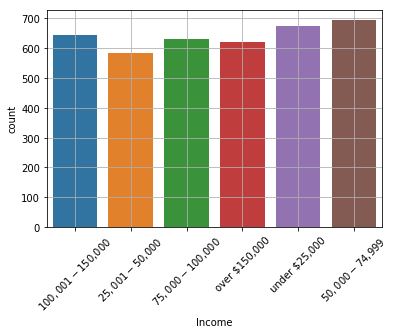

In [11]:
#checking count of different income category
sns.countplot(x='Income', data=train)
plt.xticks(rotation=45)
plt.grid()

In [12]:
pd.crosstab(train.Income,train.Party,margins=True).style.background_gradient(cmap='summer_r')

Party,0,1,All
Income,,,
"$100,001 - $150,000",343,300,643
"$25,001 - $50,000",316,268,584
"$50,000 - $74,999",373,321,694
"$75,000 - $100,000",358,274,632
"over $150,000",301,320,621
"under $25,000",356,317,673
All,2047,1800,3847


We can conclude that peron having income in range 75,000-100,000 are more likely to vote Democrate Party.

In [13]:
pd.crosstab(train.Gender,train.Party,margins=True).style.background_gradient(cmap='summer_r')

Party,0,1,All
Gender,,,
Female,1082,747,1829
Male,1370,1435,2805
All,2452,2182,4634


We can conclude that male are more likely to give vote to Republican Party where female are more likely to vote to Democrate Party.

In [14]:
pd.crosstab(train.HouseholdStatus,train.Party,margins=True).style.background_gradient(cmap='summer_r')

Party,0,1,All
HouseholdStatus,,,
Domestic Partners (no kids),115,42,157
Domestic Partners (w/kids),32,24,56
Married (no kids),294,270,564
Married (w/kids),624,715,1339
Single (no kids),1145,912,2057
Single (w/kids),102,68,170
All,2312,2031,4343


Here we can conclude that Single and Domestic Partners(no kids) are more likely to vote to Democrat while Married(w/kids) are more likely to vote Republican Party.

In [15]:
pd.crosstab([train.HouseholdStatus,train.EducationLevel],train.Party,margins=True).style.background_gradient(cmap='summer_r')

This table gives us information about the relationship between EductionLevel and HouseholdStatus with party they vote. 

# Data Preprocessing and Feature Engineering

Here we are going to take only those question which have some important impact on our predictions.

In [16]:
#creating new dataset having important questions only
train_new = train[['YOB','Gender','Income','HouseholdStatus','EducationLevel','Q98197','Q98869','Q99480','Q99716','Q102687','Q112512','Q109244','Q108950','Q113181','Q113584','Q113992','Q114517','Q120650','Q115611','Q115899','Q116881','Q120472','Party']].copy()
validate_new = validate[['YOB','Gender','Income','HouseholdStatus','EducationLevel','Q98197','Q98869','Q99480','Q99716','Q102687','Q112512','Q109244','Q108950','Q113181','Q113584','Q113992','Q114517','Q120650','Q115611','Q115899','Q116881','Q120472','Party']].copy()

In [17]:
train_new.head()

,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q98197,Q98869,Q99480,Q99716,Q102687,...,Q113181,Q113584,Q113992,Q114517,Q120650,Q115611,Q115899,Q116881,Q120472,Party
0,1971.0,Female,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,No,No,Yes,No,Yes,...,No,People,No,Yes,Yes,No,Circumstances,Happy,Art,0
1,1981.0,Female,"$25,001 - $50,000",Married (w/kids),Associate's Degree,Yes,NaN,Yes,No,No,...,Yes,NaN,No,No,NaN,No,NaN,Happy,NaN,1
2,1999.0,Female,NaN,Single (no kids),Current K-12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,0
3,1997.0,Male,"$75,000 - $100,000",Single (no kids),Current K-12,No,No,No,No,Yes,...,No,Technology,No,Yes,No,No,Me,Right,Science,0
4,1977.0,Male,"over $150,000",Married (w/kids),Doctoral Degree,No,Yes,Yes,No,Yes,...,Yes,People,No,No,Yes,No,Me,Happy,Art,0


Calculating Age from year of birth(YOB) and droping column YOB

In [18]:
train_new['Age']=train_new.YOB.apply(lambda x: 2019-x)
train_new = train_new.drop(['YOB'],axis=1)
validate_new['Age']=validate_new.YOB.apply(lambda x: 2019-x)
validate_new = validate_new.drop(['YOB'],axis=1)
train_new.head()

,Gender,Income,HouseholdStatus,EducationLevel,Q98197,Q98869,Q99480,Q99716,Q102687,Q112512,...,Q113584,Q113992,Q114517,Q120650,Q115611,Q115899,Q116881,Q120472,Party,Age
0,Female,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,No,No,Yes,No,Yes,Yes,...,People,No,Yes,Yes,No,Circumstances,Happy,Art,0,48.0
1,Female,"$25,001 - $50,000",Married (w/kids),Associate's Degree,Yes,NaN,Yes,No,No,Yes,...,NaN,No,No,NaN,No,NaN,Happy,NaN,1,38.0
2,Female,NaN,Single (no kids),Current K-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,0,20.0
3,Male,"$75,000 - $100,000",Single (no kids),Current K-12,No,No,No,No,Yes,Yes,...,Technology,No,Yes,No,No,Me,Right,Science,0,22.0
4,Male,"over $150,000",Married (w/kids),Doctoral Degree,No,Yes,Yes,No,Yes,Yes,...,People,No,No,Yes,No,Me,Happy,Art,0,42.0


In [19]:
#finding null value
train_new.isnull().sum()

Gender               98
Income              885
HouseholdStatus     389
EducationLevel      735
Q98197             1925
Q98869             1972
Q99480             1847
Q99716             1899
Q102687            1844
Q112512            1822
Q109244            1847
Q108950            1805
Q113181            1760
Q113584            1798
Q113992            1673
Q114517            1742
Q120650            1540
Q115611            1656
Q115899            1888
Q116881            1947
Q120472            1636
Party                 0
Age                 281
dtype: int64

For null value of questions i consider it as a seperate categories as people are either unable to categorize it in either positive(yes) or negative(no) answers.

For age i put null value as mean of the age column.

In [20]:
#filling null value of question as differnet categories 2
train_new['Q98197'] = train_new.Q98197.fillna(2)
train_new['Q98869'] = train_new.Q98869.fillna(2)
train_new['Q99480'] = train_new.Q99480.fillna(2)
train_new['Q99716'] = train_new.Q99716.fillna(2)
train_new['Q102687'] = train_new.Q102687.fillna(2)
train_new['Q112512'] = train_new.Q112512.fillna(2)
train_new['Q109244'] = train_new.Q109244.fillna(2)
train_new['Q108950'] = train_new.Q108950.fillna(2)
train_new['Q113181'] = train_new.Q113181.fillna(2)
train_new['Q113584'] = train_new.Q113584.fillna(2)
train_new['Q113992'] = train_new.Q113992.fillna(2)
train_new['Q114517'] = train_new.Q114517.fillna(2)
train_new['Q120650'] = train_new.Q120650.fillna(2)
train_new['Q115611'] = train_new.Q115611.fillna(2)
train_new['Q115899'] = train_new.Q115899.fillna(2)
train_new['Q116881'] = train_new.Q116881.fillna(2)
train_new['Q120472'] = train_new.Q120472.fillna(2)

validate_new['Q98197'] = validate_new.Q98197.fillna(2)
validate_new['Q98869'] = validate_new.Q98869.fillna(2)
validate_new['Q99480'] = validate_new.Q99480.fillna(2)
validate_new['Q99716'] = validate_new.Q99716.fillna(2)
validate_new['Q102687'] = validate_new.Q102687.fillna(2)
validate_new['Q112512'] = validate_new.Q112512.fillna(2)
validate_new['Q109244'] = validate_new.Q109244.fillna(2)
validate_new['Q108950'] = validate_new.Q108950.fillna(2)
validate_new['Q113181'] = validate_new.Q113181.fillna(2)
validate_new['Q113584'] = validate_new.Q113584.fillna(2)
validate_new['Q113992'] = validate_new.Q113992.fillna(2)
validate_new['Q114517'] = validate_new.Q114517.fillna(2)
validate_new['Q120650'] = validate_new.Q120650.fillna(2)
validate_new['Q115611'] = validate_new.Q115611.fillna(2)
validate_new['Q115899'] = validate_new.Q115899.fillna(2)
validate_new['Q116881'] = validate_new.Q116881.fillna(2)
validate_new['Q120472'] = validate_new.Q120472.fillna(2)

#filling null value of Age
train_new['Age'] = train_new.Age.fillna(train_new.Age.mean())
validate_new['Age'] = validate_new.Age.fillna(train_new.Age.mean())

In [21]:
train_new.isnull().sum()

Gender              98
Income             885
HouseholdStatus    389
EducationLevel     735
Q98197               0
Q98869               0
Q99480               0
Q99716               0
Q102687              0
Q112512              0
Q109244              0
Q108950              0
Q113181              0
Q113584              0
Q113992              0
Q114517              0
Q120650              0
Q115611              0
Q115899              0
Q116881              0
Q120472              0
Party                0
Age                  0
dtype: int64

From EDA we find that maximum number of people are from income range 50,000-74,999 so for null value in income field i am filling this category.

For EducationLevel and Gender  most people are Bachelor's and Male respectively but i am not going to put these values in place of null value because if i do so thn my prediction become biased because Bachelors are more likely to vote to Democrate and Male are more likely to vote to Republican.

So in both of these column i consider null as a different categories as i did in Questions Column.
And i decided to leave the null value of HouseholdStatus

In [22]:
train_new['Income'] = train_new.Income.fillna('50,00-74,999')
train_new['EducationLevel'] = train_new.EducationLevel.fillna('Others')
train_new['Gender'] = train_new.Gender.fillna('Not given')

validate_new['Income'] = validate_new.Income.fillna('50,00-74,999')
validate_new['EducationLevel'] = validate_new.EducationLevel.fillna('Others')
validate_new['Gender'] = validate_new.Gender.fillna('Not given')

In [23]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 23 columns):
Gender             4732 non-null object
Income             4732 non-null object
HouseholdStatus    4343 non-null object
EducationLevel     4732 non-null object
Q98197             4732 non-null object
Q98869             4732 non-null object
Q99480             4732 non-null object
Q99716             4732 non-null object
Q102687            4732 non-null object
Q112512            4732 non-null object
Q109244            4732 non-null object
Q108950            4732 non-null object
Q113181            4732 non-null object
Q113584            4732 non-null object
Q113992            4732 non-null object
Q114517            4732 non-null object
Q120650            4732 non-null object
Q115611            4732 non-null object
Q115899            4732 non-null object
Q116881            4732 non-null object
Q120472            4732 non-null object
Party              4732 non-null int64
Age           

Categorizing the Age Column into 6 groups and apply get_dummies() to break each category of a column into different column. 

In [24]:
train_new['CatAge'] = pd.qcut(train_new.Age, q=7, labels=False )
train_new = train_new.drop(['Age'],axis=1)

validate_new['CatAge'] = pd.qcut(validate_new.Age, q=7, labels=False )
validate_new = validate_new.drop(['Age'],axis=1)
                           
#Get_Dummies
train_new = pd.get_dummies(train_new, drop_first=False)
validate_new = pd.get_dummies(validate_new, drop_first=False)
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 77 columns):
Party                                          4732 non-null int64
CatAge                                         4732 non-null int64
Gender_Female                                  4732 non-null uint8
Gender_Male                                    4732 non-null uint8
Gender_Not given                               4732 non-null uint8
Income_$100,001 - $150,000                     4732 non-null uint8
Income_$25,001 - $50,000                       4732 non-null uint8
Income_$50,000 - $74,999                       4732 non-null uint8
Income_$75,000 - $100,000                      4732 non-null uint8
Income_50,00-74,999                            4732 non-null uint8
Income_over $150,000                           4732 non-null uint8
Income_under $25,000                           4732 non-null uint8
HouseholdStatus_Domestic Partners (no kids)    4732 non-null uint8
HouseholdStatus_Domest

In [25]:
train_new.head()

,Party,CatAge,Gender_Female,Gender_Male,Gender_Not given,"Income_$100,001 - $150,000","Income_$25,001 - $50,000","Income_$50,000 - $74,999","Income_$75,000 - $100,000","Income_50,00-74,999",...,Q115611_Yes,Q115899_2,Q115899_Circumstances,Q115899_Me,Q116881_2,Q116881_Happy,Q116881_Right,Q120472_2,Q120472_Art,Q120472_Science
0,0,5,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,1,3,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,0,4,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [26]:
validate_new.head()

,Party,CatAge,Gender_Female,Gender_Male,Gender_Not given,"Income_$100,001 - $150,000","Income_$25,001 - $50,000","Income_$50,000 - $74,999","Income_$75,000 - $100,000","Income_50,00-74,999",...,Q115611_Yes,Q115899_2,Q115899_Circumstances,Q115899_Me,Q116881_2,Q116881_Happy,Q116881_Right,Q120472_2,Q120472_Art,Q120472_Science
0,1,3,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,1,1,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


# Building Classifier

Importing Libraries

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

### Using Grid Search For HyperParameter Optimization

In [28]:
#Declaring keyparameter for grid search
n_estimators = np.arange(3,25,2)
max_depth = np.arange(1,5,1)
criterion = ['gini', 'entropy']
min_samples_split = np.arange(2,6,1)
min_samples_leaf = np.arange(2,6,1)
random_state = [1337]

# Create the parameter grid
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

# Creating a RandomForest model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           verbose = 1,
                           n_jobs=-1)

Dividing dataset into data having only labels and data without labels...

In [29]:
train_labels = train_new['Party']
training = train_new.drop('Party',axis=1).values[:]
validate_labels = validate_new['Party']
validating = validate_new.drop('Party',axis=1).values[:]

In [30]:
# Execute training by grid search model
grid_search.fit(training, train_labels)

Fitting 3 folds for each of 1408 candidates, totalling 4224 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 2440 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 3540 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4224 out of 4224 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'max_depth': array([1, 2, 3, 4]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5]), 'min_samples_leaf': array([2, 3, 4, 5]), 'random_state': [1337]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [31]:
# Checkout the best set of Parameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 19,
 'random_state': 1337}

In [32]:
# Get the best estimator
best_rf = grid_search.best_estimator_

### Checking Accuracy on Testing Data 

In [33]:
# Get a list of predictions on test data for training
predictions = list(best_rf.predict(training))

print('Accuracy:', best_rf.score(training, train_labels))
print('Precision:', precision_score(list(train_labels), predictions))
print('Recall:', recall_score(list(train_labels), predictions))

Accuracy: 0.6491969568892646
Precision: 0.6532826912642431
Recall: 0.541123595505618


In [34]:
cm = confusion_matrix(train_labels, predictions)
cm

array([[1868,  639],
       [1021, 1204]], dtype=int64)

### Checking Accuracy on Validation Data 

In [35]:
# Get a list of predictions on test data for evaluation
predictions = list(best_rf.predict(validating))

print('Accuracy:', best_rf.score(validating, validate_labels))
print('Precision:', precision_score(list(validate_labels), predictions))
print('Recall:', recall_score(list(validate_labels), predictions))

Accuracy: 0.6411483253588517
Precision: 0.6329479768786127
Recall: 0.5586734693877551


In [36]:
cm = confusion_matrix(validate_labels, predictions)
cm

array([[317, 127],
       [173, 219]], dtype=int64)